In [1]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 56.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.6/752.6 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("/kaggle/input/titanic/Titanic-Dataset.csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = df.copy()


In [5]:
data["HasCabin"] = data["Cabin"].notna().astype(int)
data["FamilySize"] = data["SibSp"] + data["Parch"]
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
data.drop(columns=[c for c in drop_cols if c in data.columns], inplace=True)

y = data["Survived"]
X = data.drop(columns=["Survived"])



/tmp/ipykernel_37/4155415013.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_features = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
cat_features = [c for c in X.columns if c not in num_features]


In [7]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [8]:
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svc", SVC(C=1, kernel="rbf", probability=True, class_weight="balanced", random_state=42))
])

In [9]:
mlflow.set_tracking_uri("file:///kaggle/working/mlruns")
mlflow.set_experiment("Titanic_SVM")

2025/11/03 18:40:14 INFO mlflow.tracking.fluent: Experiment with name 'Titanic_SVM' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///kaggle/working/mlruns/858550849293197696', creation_time=1762195214150, experiment_id='858550849293197696', last_update_time=1762195214150, lifecycle_stage='active', name='Titanic_SVM', tags={}>

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7877094972067039
Precision: 0.6867469879518072
Recall: 0.8260869565217391
F1: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       110
           1       0.69      0.83      0.75        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



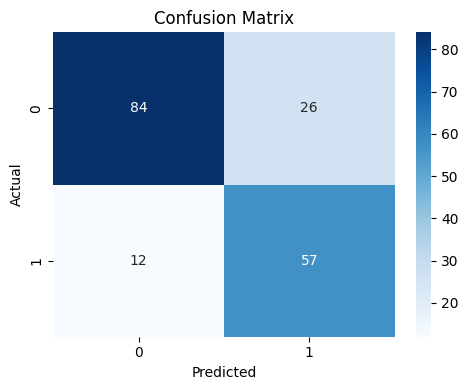

2025/11/03 18:40:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/03 18:40:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 Training finished


In [10]:
with mlflow.start_run(run_name="SVM_Basic_Run"):
    mlflow.log_param("C", 1)
    mlflow.log_param("kernel", "rbf")
    mlflow.log_param("class_weight", "balanced")

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    # تقييم
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="plots")
    plt.show()

    mlflow.sklearn.log_model(svm_model, artifact_path="model")

print("\n Training finished")

In [11]:

mlflow.set_experiment("Malak Experiment")

with mlflow.start_run():
    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_metric("accuracy", 0.92)


2025/11/03 18:40:27 INFO mlflow.tracking.fluent: Experiment with name 'Malak Experiment' does not exist. Creating a new experiment.
